# Financial Econometrics I: Homework 1

Team Member:

Lin Zhang : 15845542@fsv.cuni.cz

Weiwei Qu : 51014941@fsv.cuni.cz

# Problem 1

From the the symbols.csv choose 1 of the 10 Sectors (Industrials, Financials, Health Care, etc.).
Download the prices for all the stocks belonging to the corresponding Sector for the period 01/2015 - 12/2021. Exclude the stocks that are not available in the quantmod package. Check that your data contains all the desired symbols (include this check in your output).

In [1]:
# Setup environment
Sys.setenv(LANG = "en")
library(repr)
library("quantmod")
options(repr.plot.width = 10, repr.plot.height = 8)

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
# read data from file
smbs <- read.csv('symbols.csv',sep = ';',colClasses = "character")
head(smbs)

锘縎ymbol,Name,Sector
MMM,3M Co.,Industrials
ACE,ACE Limited,Financials
ABT,Abbott Laboratories,Health Care
ANF,Abercrombie & Fitch Company A,Consumer Discretionary
ACN,Accenture,Information Technology
ADBE,Adobe Systems Inc,Information Technology


In [5]:
symbols <- smbs[smbs['Sector'] == 'Consumer Discretionary',1]
symbols

[1] "ANF"   "AMZN"  "APOL"  "AN"    "AZO"   "BEAM"  "BBBY"  "BBY"   "BIG"  
[10] "HRB"   "BWA"   "CVC"   "KMX"   "CCL"   "CBS"   "CMG"   "COH"   "CMCSA"
[19] "DHI"   "DRI"   "DV"    "DTV"   "DISCA" "DLTR"  "EXPE"  "FDO"   "F"    
[28] "FOSL"  "GME"   "GCI"   "GPS"   "GPC"   "GT"    "HOG"   "HAR"   "HAS"  
[37] "HD"    "IGT"   "IPG"   "JCI"   "KSS"   "LEG"   "LEN"   "LTD"   "LOW"  
[46] "M"     "MAR"   "MAT"   "MCD"   "MHP"   "NWL"   "NWSA"  "NKE"   "JWN"  
[55] "ORLY"  "OMC"   "JCP"   "RL"    "PHM"   "ROST"  "SNI"   "SHLD"  "SHW"  
[64] "SNA"   "SWK"   "SPLS"  "SBUX"  "HOT"   "TGT"   "TIF"   "TWX"   "TWC"  
[73] "TJX"   "TRIP"  "URBN"  "VFC"   "VIAB"  "DIS"   "WPO"   "WHR"   "WYN"  
[82] "WYNN"  "YUM"

In [6]:
# symbols read in from the file
length(symbols)

[1] 83

In [7]:
#download data
data <- lapply(symbols, function(y)
{
    try(getSymbols(y, auto.assign = FALSE,from = as.Date('2015-01-01'), to = '2021-12-31'),silent=TRUE)
})


Warning message:
"APOL download failed; trying again."Warning message:
"CVC download failed; trying again."Warning message:
"CBS download failed; trying again."Warning message:
"COH download failed; trying again."Warning message:
"DTV download failed; trying again."Warning message:
"FDO download failed; trying again."Warning message:
"HAR contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."Warning message:
"LTD download failed; trying again."Warning message:
"MHP contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."Warning message:
"JCP download failed; trying again."Warning message:
"SNI contains missing values. Some functions will not work if objects contain missing values in the middle of the seri

In [8]:
names(data) <- symbols

In [9]:
# check the symbols used for downloading process
length(data)

[1] 83

In [10]:
# remove stocks that are not available from Default Yahoo data source
for (i in seq_along(data)) {    
   if(grepl('Error', data[[i]][1], fixed=TRUE)){
       print(data[[i]][1])
       data[[i]]<-NULL
    }
}

Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"APOL\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"APOL\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"CVC\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"CVC\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"CBS\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"CBS\".\nargument \"conn\" is missing, with no default\n"
[1] "Error in getSymbols.yahoo(Symbols = \"COH\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"COH\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"DTV\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"DTV\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"FDO\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"FDO\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in i

[1] "Error in getSymbols.yahoo(Symbols = \"LTD\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"LTD\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in i

[1] "Error in getSymbols.yahoo(Symbols = \"JCP\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"JCP\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"SPLS\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"SPLS\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"TIF\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"TIF\".\nargument \"conn\" is missing, with no default\n"
[1] "Error in getSymbols.yahoo(Symbols = \"TWC\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"TWC\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

[1] "Error in getSymbols.yahoo(Symbols = \"VIAB\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"VIAB\".\nargument \"conn\" is missing, with no default\n"
[1] "Error in getSymbols.yahoo(Symbols = \"WPO\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"WPO\".\nargument \"conn\" is missing, with no default\n"
[1] "Error in getSymbols.yahoo(Symbols = \"WYN\", env = <environment>, verbose = FALSE,  : \n  Unable to import \"WYN\".\nargument \"conn\" is missing, with no default\n"


Warning message in if (grepl("Error", data[[i]][1], fixed = TRUE)) {:
"the condition has length > 1 and only the first element will be used"

ERROR: Error in data[[i]]: subscript out of bounds


In [16]:
length(data) # available stock data

[1] 69

In [13]:
# only need the closing price
data <- lapply(names(data), function(y){
    data[[y]] <- data[[y]][, paste0(y, '.Close')]
})

In [19]:
# check the date range
head(data[[1]])
tail(data[[1]])

           ANF.Close
2015-01-02     28.58
2015-01-05     28.27
2015-01-06     28.88
2015-01-07     29.33
2015-01-08     29.11
2015-01-09     28.19

           ANF.Close
2021-12-22     34.20
2021-12-23     34.36
2021-12-27     34.71
2021-12-28     34.33
2021-12-29     35.34
2021-12-30     35.46

In [18]:
class(data)

[1] "list"

1. Compute the log-returns and simple returns for all the stocks. Save these to lrets and rets objectsm respectively. From now on, you will work with the logarithmic returns.

In [20]:
# compute log-returns for returns
lrets <- lapply(data, function(y){
  y <- na.omit(diff(log(y)))  
})
head(lrets[[1]])

# compute simple returns
rets <- lapply(data, function(y){
  y <- na.omit(diff(y)/lag(y))
})

head(rets[[1]])

              ANF.Close
2015-01-05 -0.010906001
2015-01-06  0.021348108
2015-01-07  0.015461604
2015-01-08 -0.007529091
2015-01-09 -0.032114452
2015-01-12  0.003541080

              ANF.Close
2015-01-05 -0.010846746
2015-01-06  0.021577609
2015-01-07  0.015581753
2015-01-08 -0.007500818
2015-01-09 -0.031604259
2015-01-12  0.003547357

2. Compute the sample mean, variance, skewness, excess kurtosis, minimum and maximum of
the series of logarithmic returns for each of the stocks in your sample. Display these in a
nicely readable manner.

In [22]:
#data need to match timmestamps.So check the dates that are common for all the symbols.
dates <- index(lrets[[1]])
date_len <- length(dates)
date_len

[1] 1761

In [23]:
length(lrets)

[1] 69

In [25]:
# remove the stocks do not have enough data
for (i in 2:length(lrets)){
    if (length(lrets[[i]]) < date_len){
        lrets[[i]] <- NULL
    }
}


ERROR: Error in lrets[[i]]: subscript out of bounds


In [26]:
length(lrets)

[1] 61

In [28]:
#check the dates for each stock
lapply(lrets, nrow)

[[1]]
[1] 1761

[[2]]
[1] 1761

[[3]]
[1] 1761

[[4]]
[1] 1761

[[5]]
[1] 1761

[[6]]
[1] 1761

[[7]]
[1] 1761

[[8]]
[1] 1761

[[9]]
[1] 1761

[[10]]
[1] 1761

[[11]]
[1] 1761

[[12]]
[1] 1761

[[13]]
[1] 1761

[[14]]
[1] 1761

[[15]]
[1] 1761

[[16]]
[1] 1761

[[17]]
[1] 1761

[[18]]
[1] 1761

[[19]]
[1] 1761

[[20]]
[1] 1761

[[21]]
[1] 1761

[[22]]
[1] 1761

[[23]]
[1] 1761

[[24]]
[1] 1761

[[25]]
[1] 1761

[[26]]
[1] 1761

[[27]]
[1] 1761

[[28]]
[1] 1761

[[29]]
[1] 1761

[[30]]
[1] 1761

[[31]]
[1] 1761

[[32]]
[1] 1761

[[33]]
[1] 1761

[[34]]
[1] 1761

[[35]]
[1] 1761

[[36]]
[1] 1761

[[37]]
[1] 1761

[[38]]
[1] 1761

[[39]]
[1] 1761

[[40]]
[1] 1761

[[41]]
[1] 1761

[[42]]
[1] 1761

[[43]]
[1] 1761

[[44]]
[1] 1761

[[45]]
[1] 1761

[[46]]
[1] 1761

[[47]]
[1] 1761

[[48]]
[1] 1761

[[49]]
[1] 1761

[[50]]
[1] 1761

[[51]]
[1] 1761

[[52]]
[1] 1761

[[53]]
[1] 1761

[[54]]
[1] 1761

[[55]]
[1] 1761

[[56]]
[1] 1761

[[57]]
[1] 1761

[[58]]
[1] 1761

[[59]]
[1] 1761

[[60]]
[1] 1761

[[61]]
[1] 1761

In [30]:
# Compute the summary statistics 
stats <- lapply(lrets, function(y){
    c(mean(y), sd(y), min(y), max(y))
})
# Round the numbers
stats <- sapply(stats, function(y){
    round(y, 4)
    })
# Format the output
rownames(stats) <- c('mean', 'sd', 'min', 'max')
#colnames(stats) <- symbols
stats


mean,0.0001,0.0014,0.0004,0.0007,-0.0009,0.0005,0.0001,-0.0002,-0.0001,0.0004,...,0.0006,0.0006,0.0005,-0.0006,-0.0001,0.0000,0.0003,0.0001,-0.0003,0.0006
sd,0.0366,0.0188,0.0230,0.0167,0.0434,0.0237,0.0328,0.0231,0.0218,0.0222,...,0.0164,0.0180,0.0175,0.0323,0.0298,0.0204,0.0168,0.0224,0.0329,0.0161
min,-0.3075,-0.0825,-0.2121,-0.1736,-0.4525,-0.1655,-0.3502,-0.1977,-0.1220,-0.2304,...,-0.1768,-0.1310,-0.2281,-0.2643,-0.1650,-0.1384,-0.1391,-0.2183,-0.2802,-0.2087
max,0.2235,0.1322,0.1462,0.1114,0.4831,0.1946,0.2831,0.1404,0.1498,0.1661,...,0.1374,0.1859,0.1214,0.2274,0.1939,0.1311,0.1346,0.2591,0.2444,0.2090


3. Try to devise one Figure that plots all time series of returns in your sample.

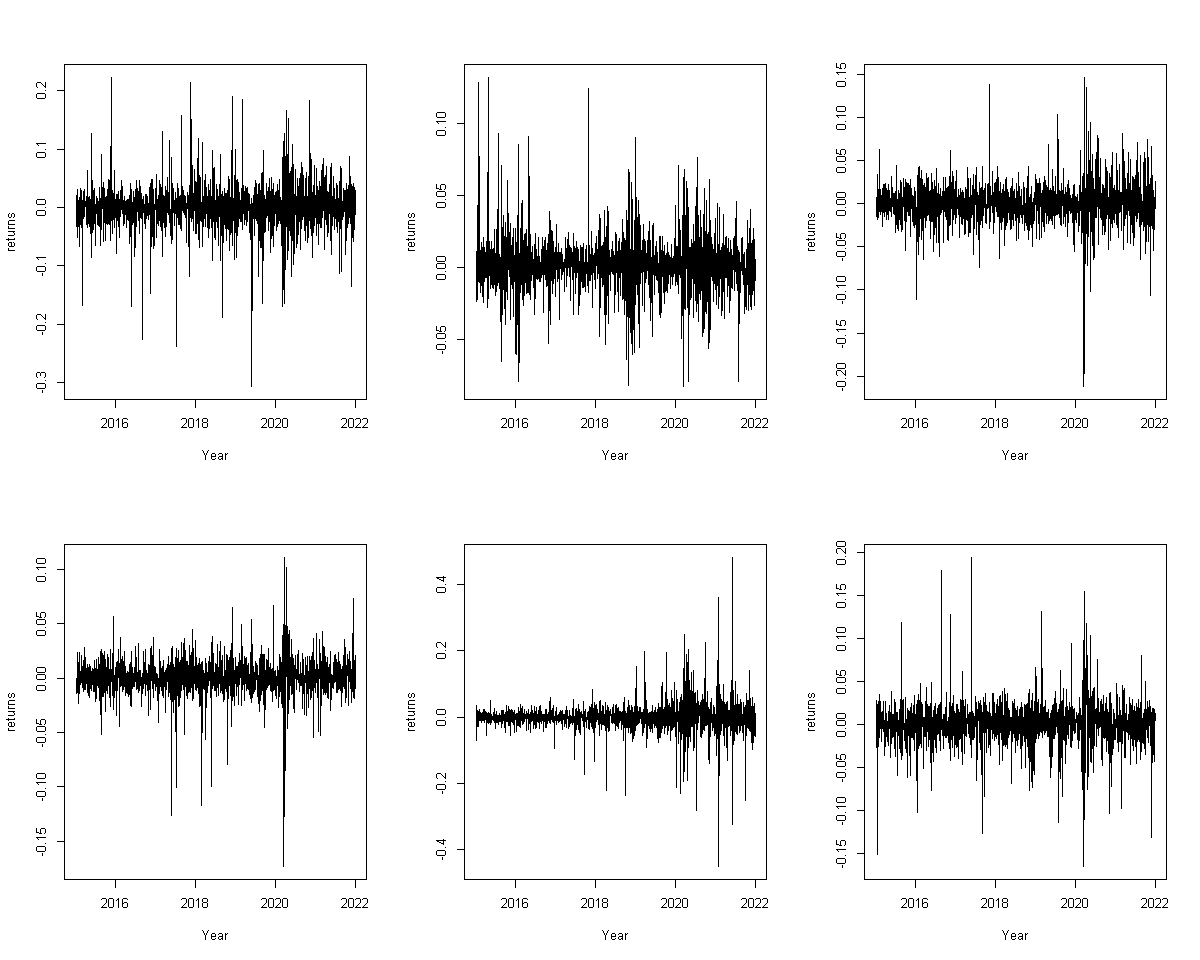

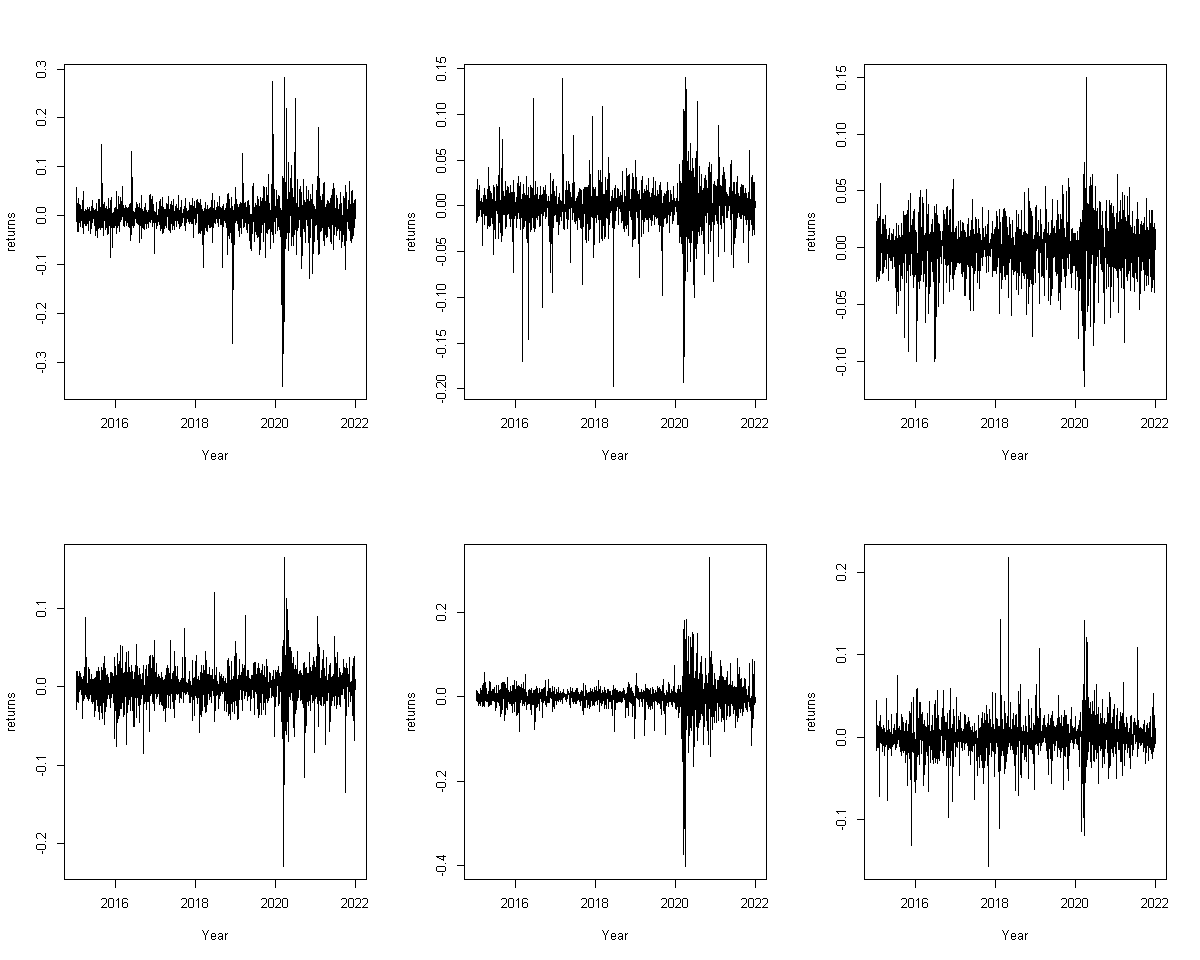

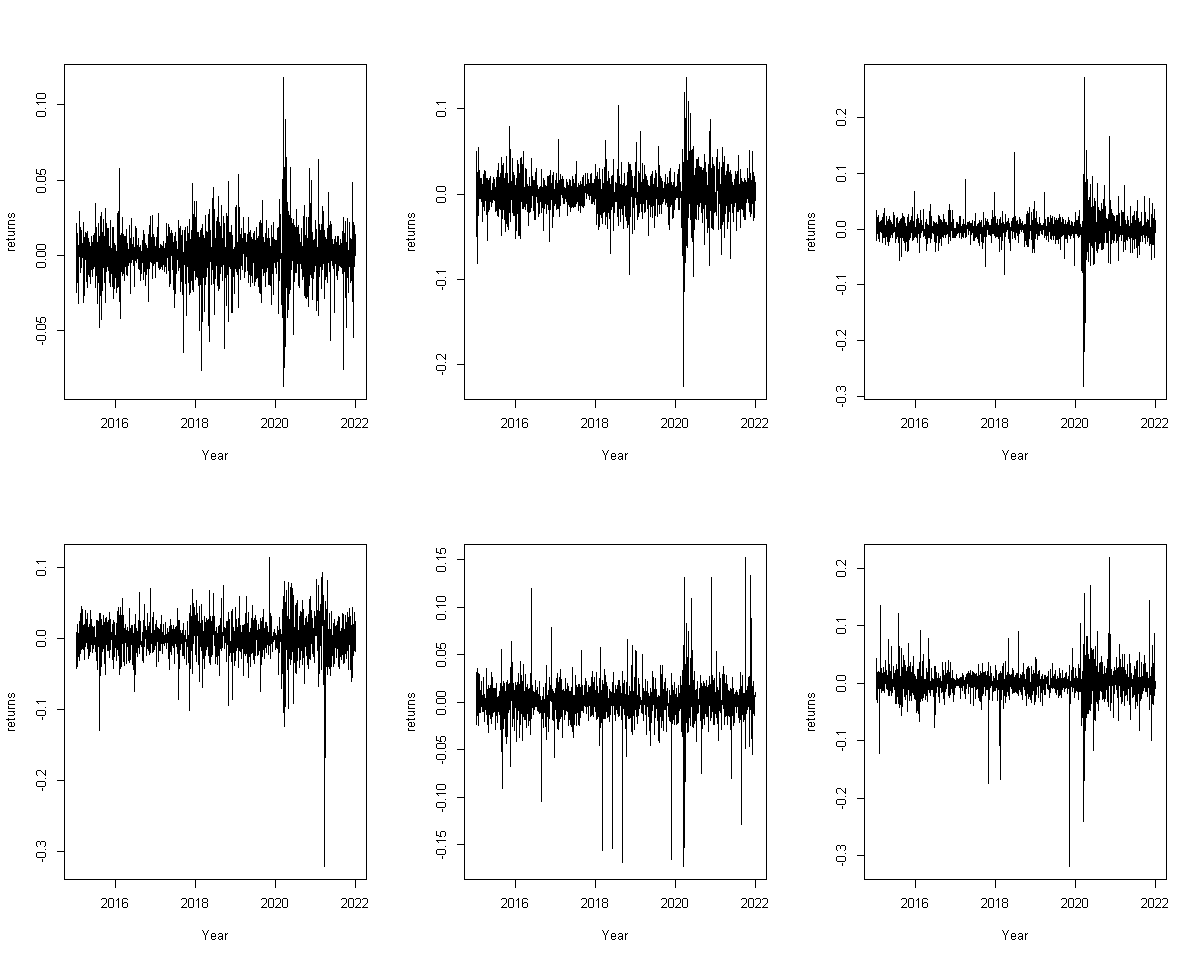

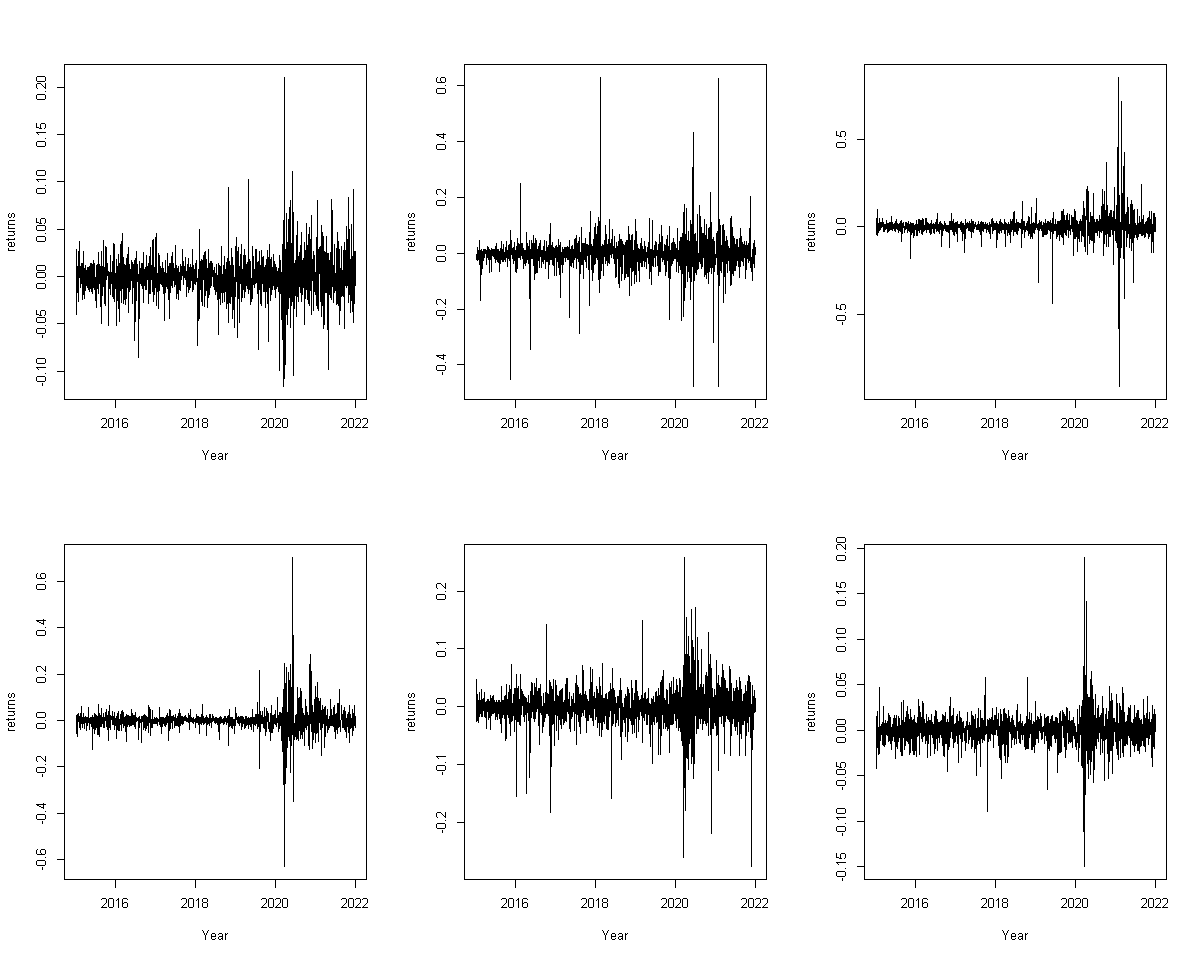

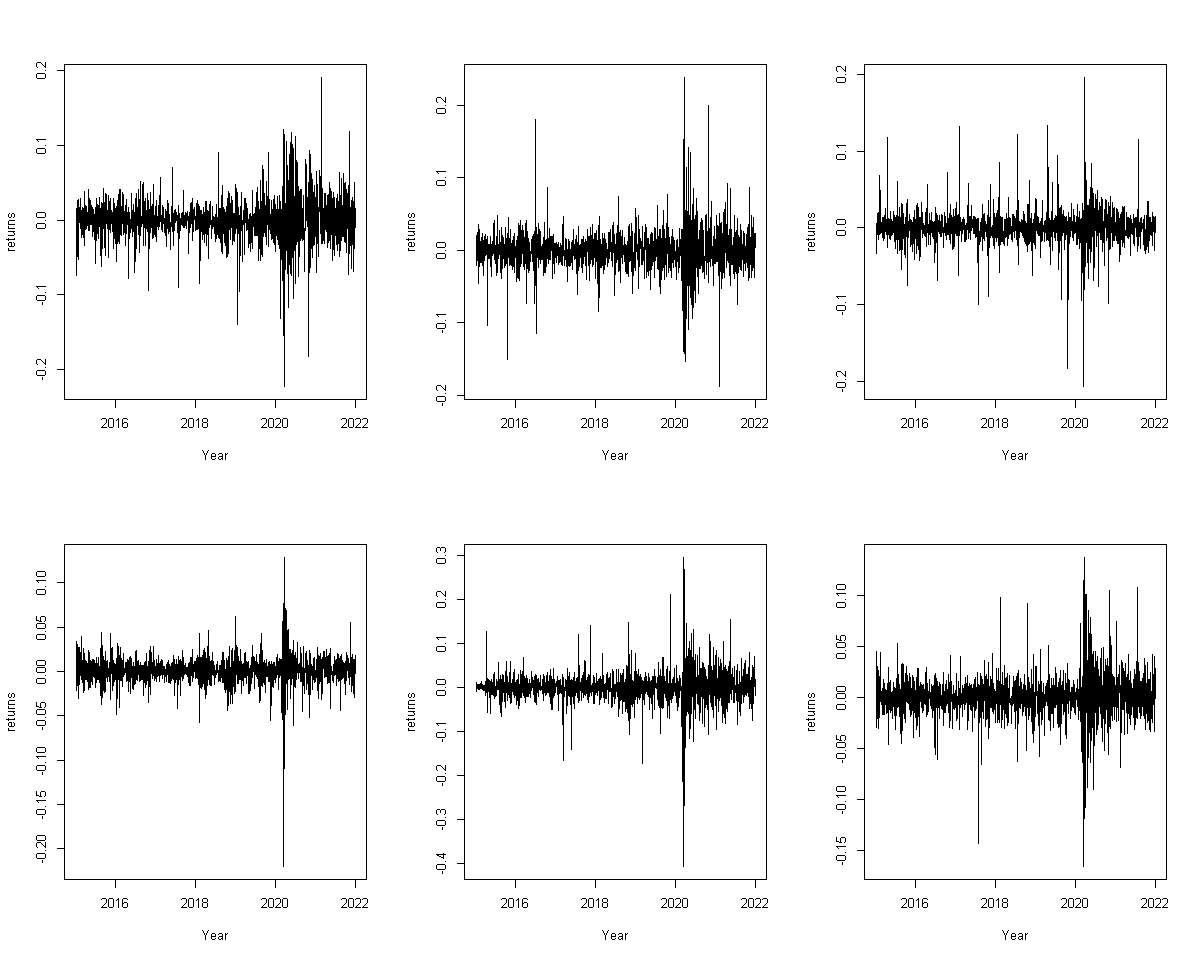

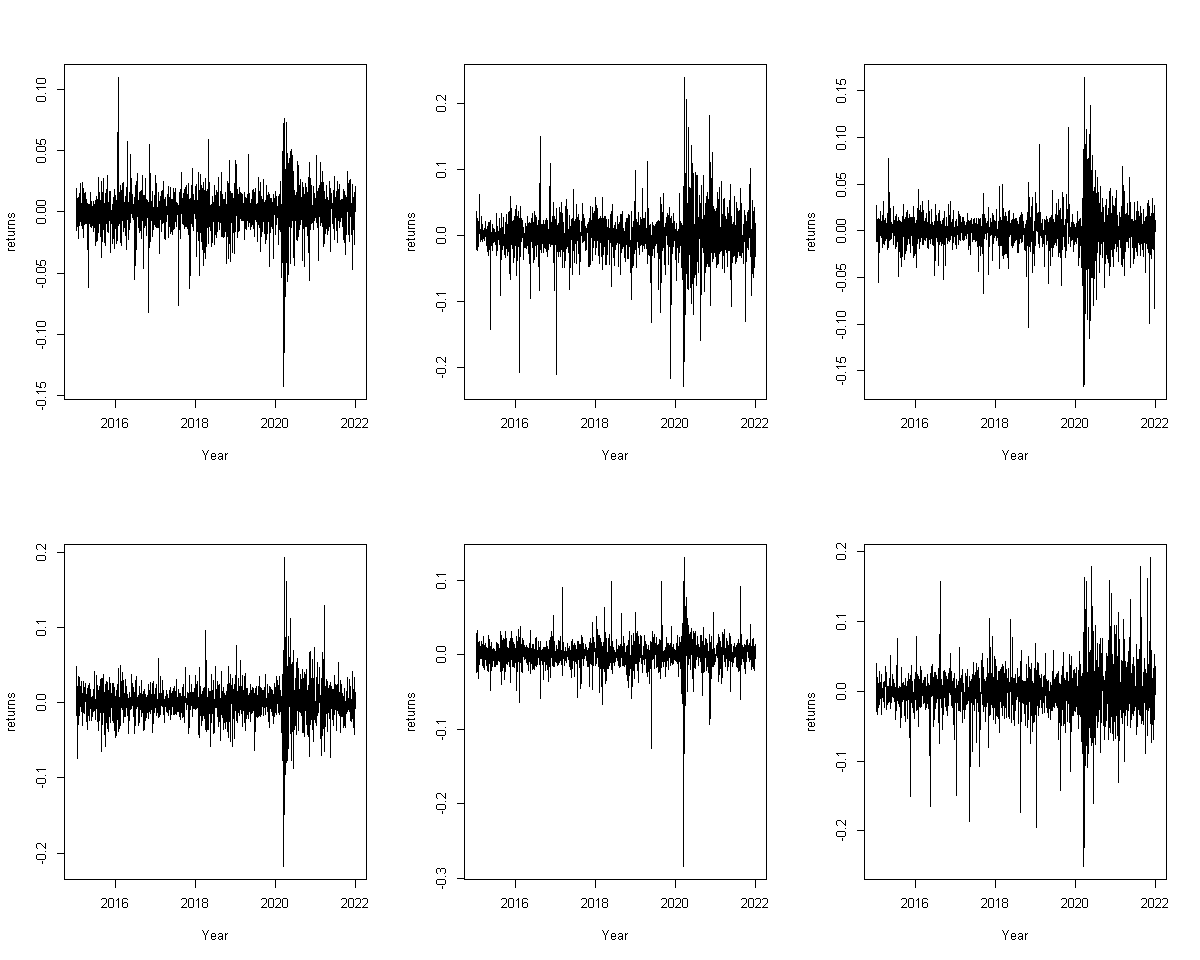

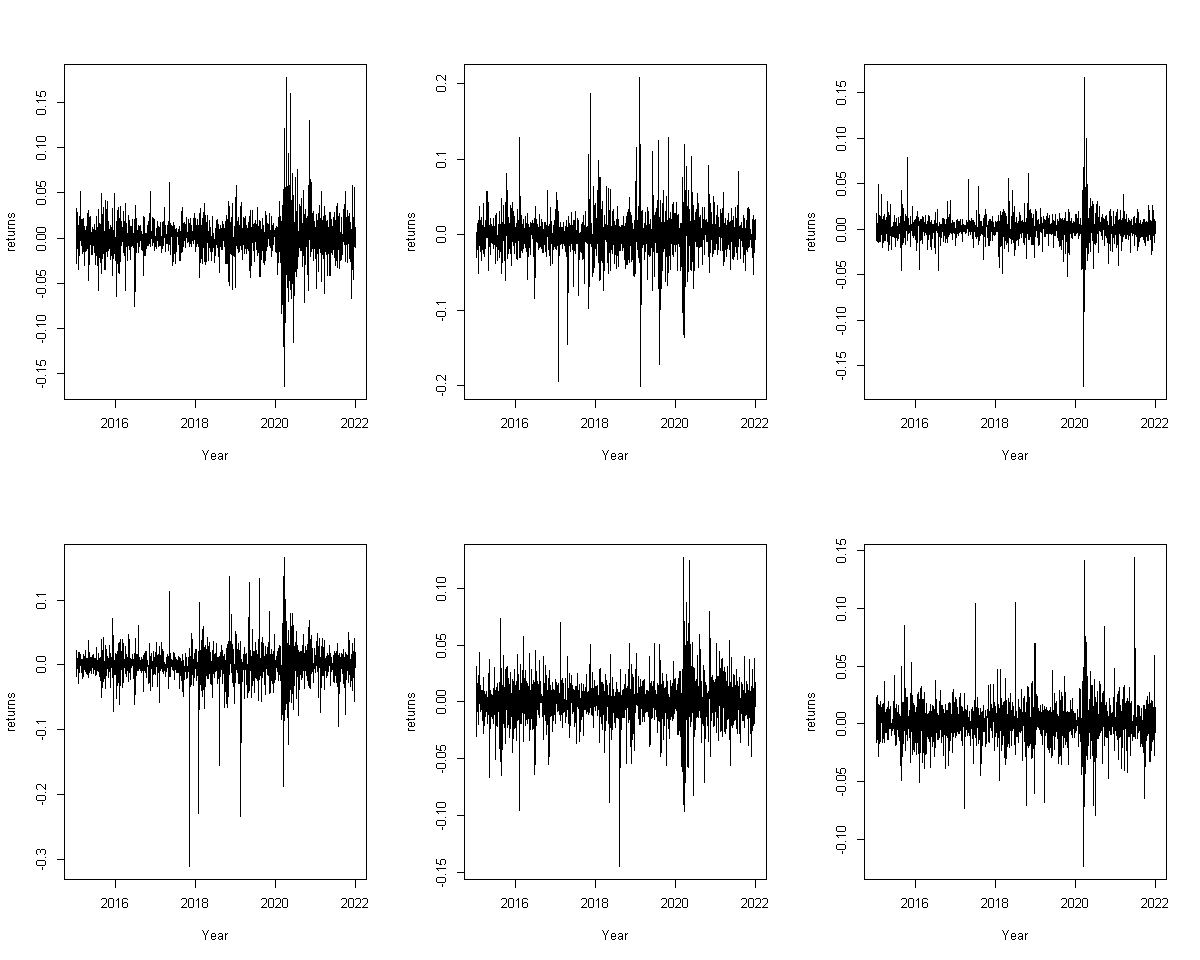

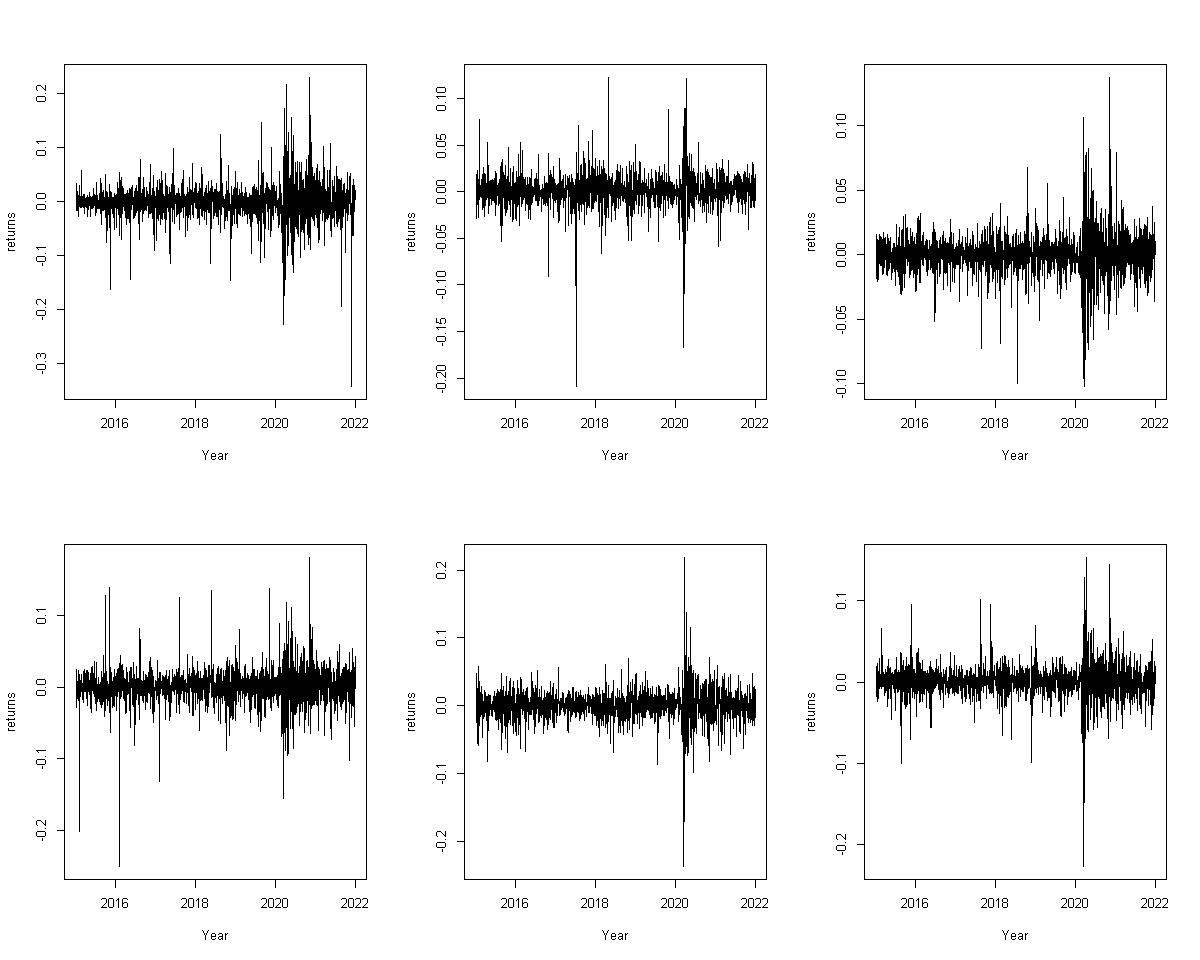

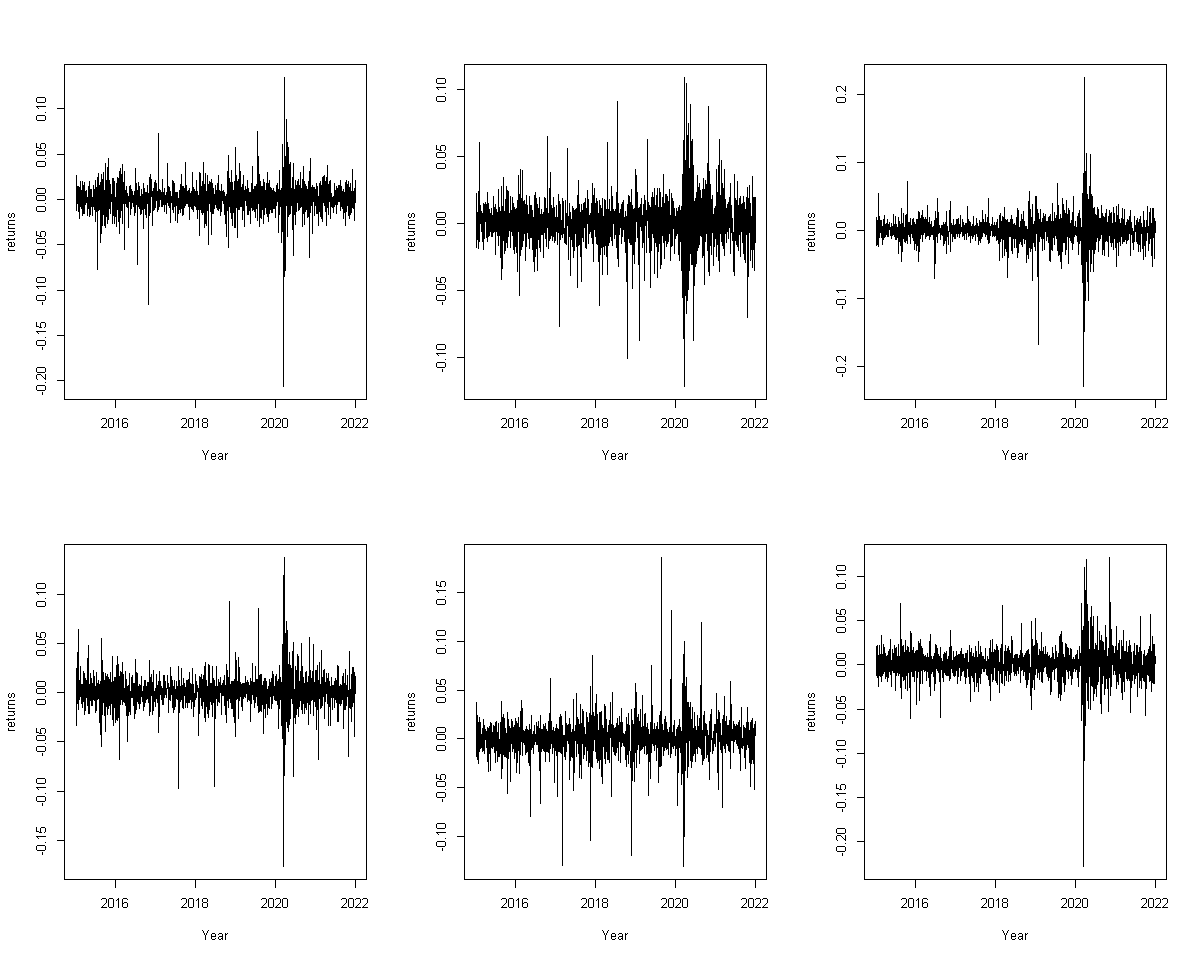

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

[[31]]
NULL

[[32]]
NULL

[[33]]
NULL

[[34]]
NULL

[[35]]
NULL

[[36]]
NULL

[[37]]
NULL

[[38]]
NULL

[[39]]
NULL

[[40]]
NULL

[[41]]
NULL

[[42]]
NULL

[[43]]
NULL

[[44]]
NULL

[[45]]
NULL

[[46]]
NULL

[[47]]
NULL

[[48]]
NULL

[[49]]
NULL

[[50]]
NULL

[[51]]
NULL

[[52]]
NULL

[[53]]
NULL

[[54]]
NULL

[[55]]
NULL

[[56]]
NULL

[[57]]
NULL

[[58]]
NULL

[[59]]
NULL

[[60]]
NULL

[[61]]
NULL

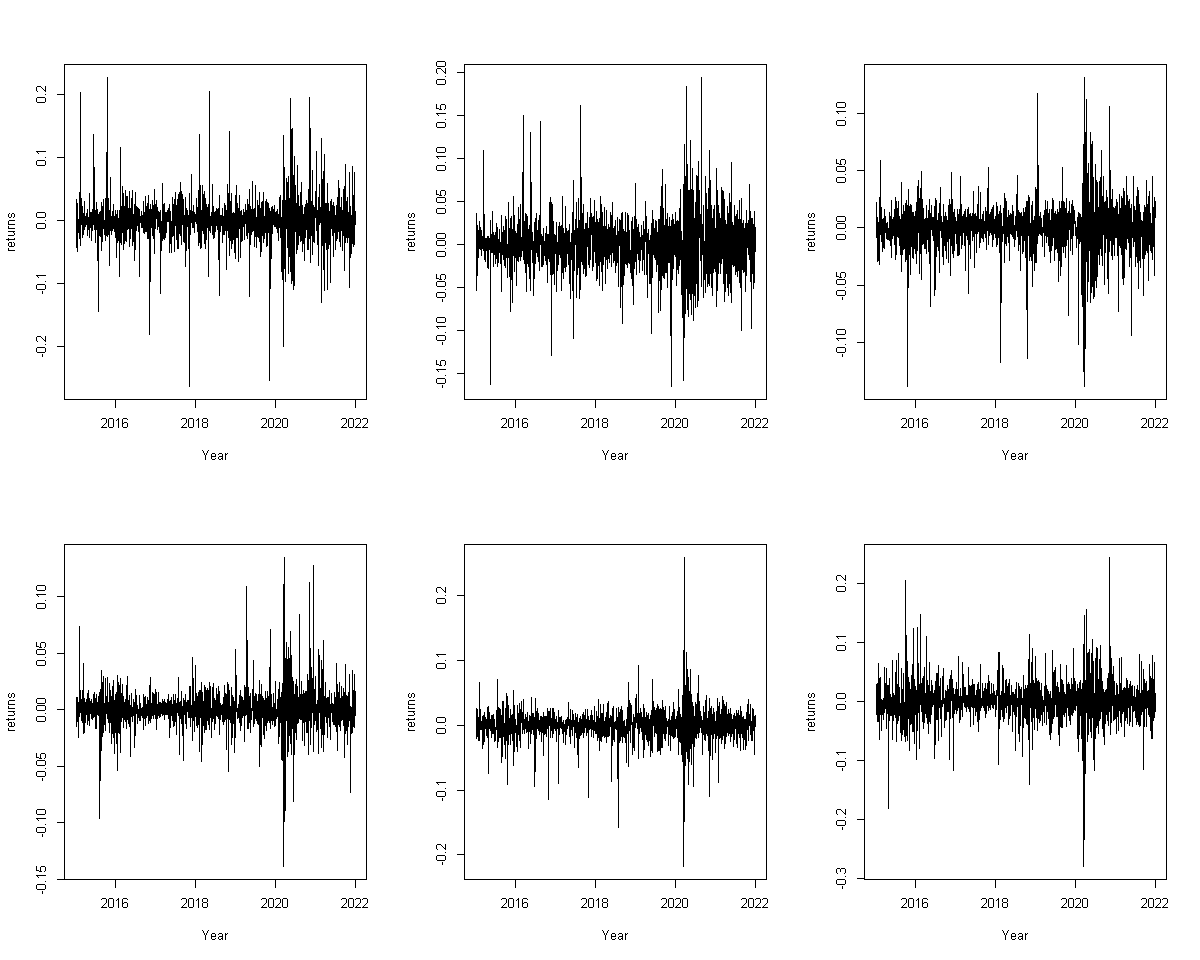

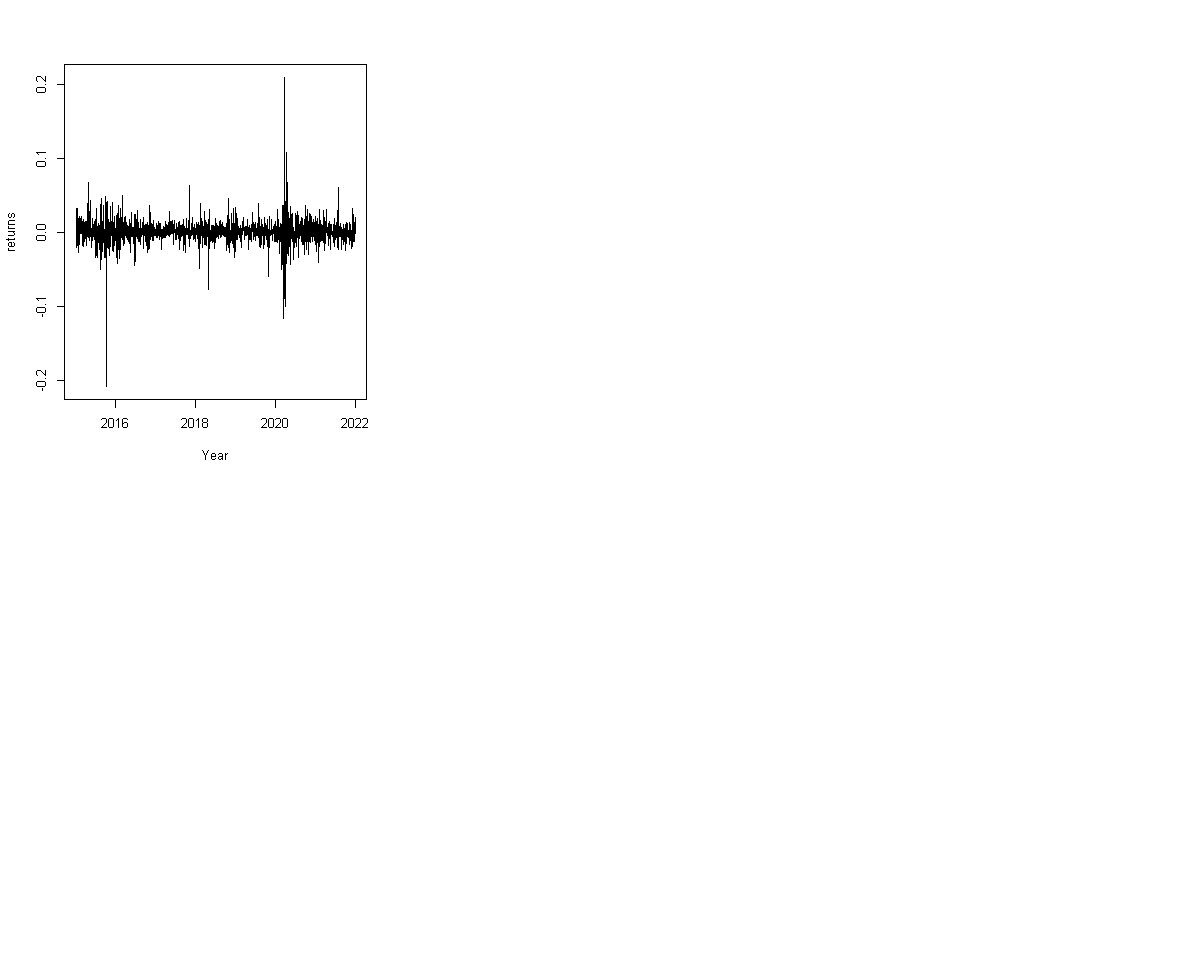

In [31]:
par(mfrow = c(2, 3))
sapply(lrets, function(y){
    plot(as.Date(index(y)), y, type = 'l', xlab = 'Year',
     ylab = 'returns')
})